# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eka Pramuditya
- **Email:** ajeeka30@gmail.com
- **ID Dicoding:** eka_pramuditya_23

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda setiap musim selama dua tahun (2011 dan 2012)?
- Bagaimana pengaruh hari libur kerja dan situasi cuaca terhadap rata-rata penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ekaprmdtya13/Analisis_Data_Dicoding/refs/heads/main/Data/day.csv")
df = pd.DataFrame(data)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengupload dataset yang diberikan oleh Dicoding ke github supaya dapat lebih mudah diakses secara public
- Membaca data dengan format berkas csv

### Assessing Data

In [3]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [4]:
df.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    ranges = {}
    for column in columns:
        if column not in df.columns:
            print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
            continue

        Q1 = df[column].quantile(0.25)  # Kuartil pertama
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang antar-kuartil

        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        outliers[column] = outlier_indices
        ranges[column] = (lower_bound, upper_bound)

    return outliers, ranges

# Kolom yang ingin diperiksa secara manual
columns_to_check = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Deteksi outlier
outliers, ranges = detect_outliers_iqr(df, columns_to_check)

# Menampilkan hasil
def print_outliers_and_ranges(outliers, ranges, df):
    for column in ranges.keys():
        lower_bound, upper_bound = ranges[column]
        print(f"Rentang nilai valid pada kolom '{column}': {lower_bound} hingga {upper_bound}")

        if column in outliers and outliers[column]:
            print(f"Outlier pada kolom '{column}':")
            for idx in outliers[column]:
                print(f"  Index {idx}: {df.loc[idx, column]}")
        else:
            print(f"Tidak ada outlier pada kolom '{column}'")

print_outliers_and_ranges(outliers, ranges, df)

Rentang nilai valid pada kolom 'temp': -0.14041600000000015 hingga 1.1329160000000003
Tidak ada outlier pada kolom 'temp'
Rentang nilai valid pada kolom 'atemp': -0.06829675000000018 hingga 1.0147412500000002
Tidak ada outlier pada kolom 'atemp'
Rentang nilai valid pada kolom 'hum': 0.20468725 hingga 1.0455212500000002
Outlier pada kolom 'hum':
  Index 49: 0.187917
  Index 68: 0.0
Rentang nilai valid pada kolom 'windspeed': -0.012446750000000034 hingga 0.38061125
Outlier pada kolom 'windspeed':
  Index 44: 0.417908
  Index 49: 0.507463
  Index 93: 0.385571
  Index 94: 0.388067
  Index 292: 0.422275
  Index 382: 0.415429
  Index 407: 0.409212
  Index 420: 0.421642
  Index 432: 0.441563
  Index 433: 0.4148
  Index 450: 0.386821
  Index 666: 0.398008
  Index 721: 0.407346
Rentang nilai valid pada kolom 'casual': -855.25 hingga 2266.75
Outlier pada kolom 'casual':
  Index 148: 2355
  Index 183: 2282
  Index 184: 3065
  Index 196: 2418
  Index 246: 2521
  Index 281: 2397
  Index 441: 3155
 

**Insight:**
- Melihat data apakah ada yang kosong
- Mekihat data apakah ada yang duplicate
- Melihat tipe data di semua kolom
- Melihat data outlier pada kolom dengan tipe data numerik (bukan data numerik yang bersifat kategori)


### Cleaning Data

In [7]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    ranges = {}
    for column in columns:  # Kolom yang dipilih secara manual
        if column not in df.columns:
            print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
            continue

        Q1 = df[column].quantile(0.25)  # Kuartil pertama
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang antar-kuartil

        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        outliers[column] = outlier_indices
        ranges[column] = (lower_bound, upper_bound)

    return outliers, ranges

# Fungsi untuk mengganti nilai outlier dengan median kolom
def replace_outliers_with_median(df, outliers):
    changes = {}
    for column, indices in outliers.items():
        if indices:
            median_value = df[column].median()
            changes[column] = {idx: (df.loc[idx, column], median_value) for idx in indices}
            df.loc[indices, column] = median_value
    return changes

# Kolom yang ingin diperiksa secara manual
columns_to_check = ['hum']

# Deteksi outlier
outliers, ranges = detect_outliers_iqr(df, columns_to_check)

# Mengganti nilai outlier dengan median dan mencatat perubahan
changes = replace_outliers_with_median(df, outliers)

# Menampilkan perubahan nilai
print("Perubahan nilai outlier:")
for column, updates in changes.items():
    print(f"Kolom '{column}':")
    for idx, (old_value, new_value) in updates.items():
        print(f"  Index {idx}: {old_value} -> {new_value}")

Perubahan nilai outlier:
Kolom 'hum':
  Index 49: 0.187917 -> 0.626667
  Index 68: 0.0 -> 0.626667


**Insight:**
- Mengubah tipe data pada kolom dteday dari yang sebelumnya object(string) menjadi datetime
- Mengganti nilai outlier pada kolom 'hum' dengan nilai mediannya, sementara itu kolom 'windspeed' dan 'casual' tidak diganti nilainya meskipun terdapat outlier pada saat pengecekan. Hal ini dilakukan dengan beberapa alasan, pada kolom 'windspeed' tidak dilakukan perubahan karena nilai-nilai yang terdata sebagai outlier masih dapat dikatakan normal(kecepatan angin yang dinormalisasi pada dataset maksimal 64). sedangkan pada kolom 'casual' lonjakan data juga terjadi karena adanya pengaruh hari lbur kerja sehingga outlier masih dianggap normal.

## Exploratory Data Analysis (EDA)

### Explore Jumlah Penggunaan Sepeda per Musim

In [9]:
total_per_year_season = df.groupby(["yr", "season"])["cnt"].sum()
total_per_year_season

yr  season
0   1         150000
    2         347316
    3         419650
    4         326137
1   1         321348
    2         571273
    3         641479
    4         515476
Name: cnt, dtype: int64

### Explore Rata-rata Penggunaan Sepeda terhadap Hari Kerja dan Cuaca

In [10]:
total_average_per_workingday_and_weathersit = df.groupby(["workingday", "weathersit"])["cnt"].mean()
total_average_per_workingday_and_weathersit

workingday  weathersit
0           1             4587.269231
            2             3936.828571
            3             1815.400000
1           1             5023.902280
            2             4075.028249
            3             1799.500000
Name: cnt, dtype: float64

**Insight:**
- melihat tren jumlah penyewaan sepeda per musim di setiap tahun
- melihat pengaruh hari kerja dan cuaca terhadap rata-rata penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda setiap musim selama dua tahun (2011 dan 2012)?

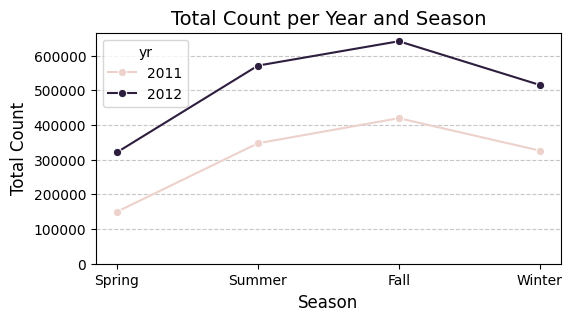

In [11]:
# Mengelompokkan data dan menghitung total per tahun dan musim
total_per_year_season = df.groupby(["yr", "season"])["cnt"].sum().reset_index()

# Mengubah angka musim menjadi keterangan
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
total_per_year_season["season"] = total_per_year_season["season"].map(season_mapping)
year_mapping = {0: 2011, 1: 2012}
total_per_year_season["yr"] = total_per_year_season["yr"].map(year_mapping)

# Membuat line chart
plt.figure(figsize=(6, 3))
sns.lineplot(data=total_per_year_season, x="season", y="cnt", hue="yr", marker="o")

plt.ylim(0, None)

# Menambahkan judul dan label
plt.title("Total Count per Year and Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh hari libur kerja dan situasi cuaca terhadap jumlah penggunaan sepeda?

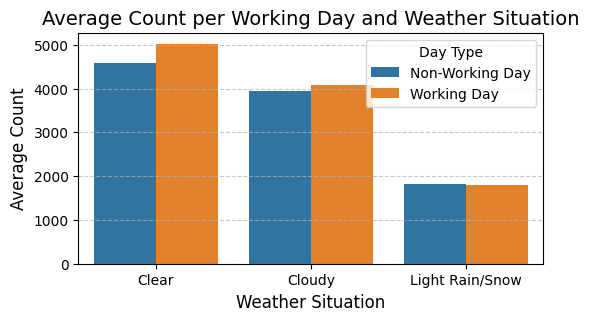

In [12]:
# Mengelompokkan data dan menghitung rata-rata per workingday dan weathersit
total_average_per_workingday_and_weathersit = df.groupby(["workingday", "weathersit"])["cnt"].mean().reset_index()

# Mengubah angka workingday dan weathersit menjadi deskripsi
workingday_mapping = {0: "Non-Working Day", 1: "Working Day"}
weathersit_mapping = {1: "Clear", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
total_average_per_workingday_and_weathersit["workingday"] = total_average_per_workingday_and_weathersit["workingday"].map(workingday_mapping)
total_average_per_workingday_and_weathersit["weathersit"] = total_average_per_workingday_and_weathersit["weathersit"].map(weathersit_mapping)

# Membuat bar chart menggunakan seaborn
plt.figure(figsize=(6, 3))
sns.barplot(
    data=total_average_per_workingday_and_weathersit,
    x="weathersit",
    y="cnt",
    hue="workingday"
)

# Menambahkan judul dan label
plt.title("Average Count per Working Day and Weather Situation", fontsize=14)
plt.xlabel("Weather Situation", fontsize=12)
plt.ylabel("Average Count", fontsize=12)
plt.legend(title="Day Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Memvisualisasikan tren penggunaan sepeda di setiap musim selama kurun waktu 2 tahun (2011 dan 2012) menggunakan diagram garis
- Memvisualisasikan pengaruh hari libur kerja dan situasi cuaca terhadap rata-rata penggunaan sepada

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren penggunaan sepeda selama kurun waktu 2 tahun (2011 dan 2012) memiliki pola yang sama yaitu musim dengan penggunaan sepeda tertinggi terjadi pada musim gugur (fall). Selain itu juga terdapat peningkatan penggunaan sepeda dari tahun 2011 ke tahun 2012 di setiap musimnya.
- secara keseluruhan Hari libur kerja kurang berpengaruh terhadap penggunaan sepeda justru rata-rata penggunaan sepeda lebih tinggi pada saat hari kerja. Namun situasi cuaca sangat berpengaruh terhadap penggunaan sepeda, terbukti dengan tingginya rata-rata penggunaan sepeda pada saat cuaca cerah. Sedangkan pada saat hujan lebat atau salju dengan kabut tidak adanya penggunaan sepeda sama sekali.

In [13]:
df.to_csv("dashboard_data.csv", index=False)